# 均一性验证，正反放置弹性体数据分析
* 罗翊杰 
* 1951578@tongji.edu.cn
* MERCI Project
* 2023/5/15

### 1. 数据载入
time,x,y,d,press,skin0_x,skin0_y,skin0_z,skin1_x,skin1_y,skin1_z,skin2_x,skin2_y,skin2_z,skin3_x,skin3_y,skin3_z


In [2]:
import numpy as np
# 不同弹性体厚度分析，载入5组数据
# 数据集路径
tset_path = {
    "upper":'./../Data/TSET_singal/singal_upper.csv',
    "bottom":'./../Data/TSET_singal/singal_bottom.csv'
}
# 载入数据
tset = {}
for t in tset_path:
    print('loading:'+tset_path[t]+'...',end='',flush=True)
    with open(tset_path[t]) as f:
        tset[t] = np.loadtxt(f,delimiter=",",skiprows=1) 
    print('[ok]') 


loading:./../Data/TSET_singal/singal_upper.csv...[ok]
loading:./../Data/TSET_singal/singal_bottom.csv...[ok]


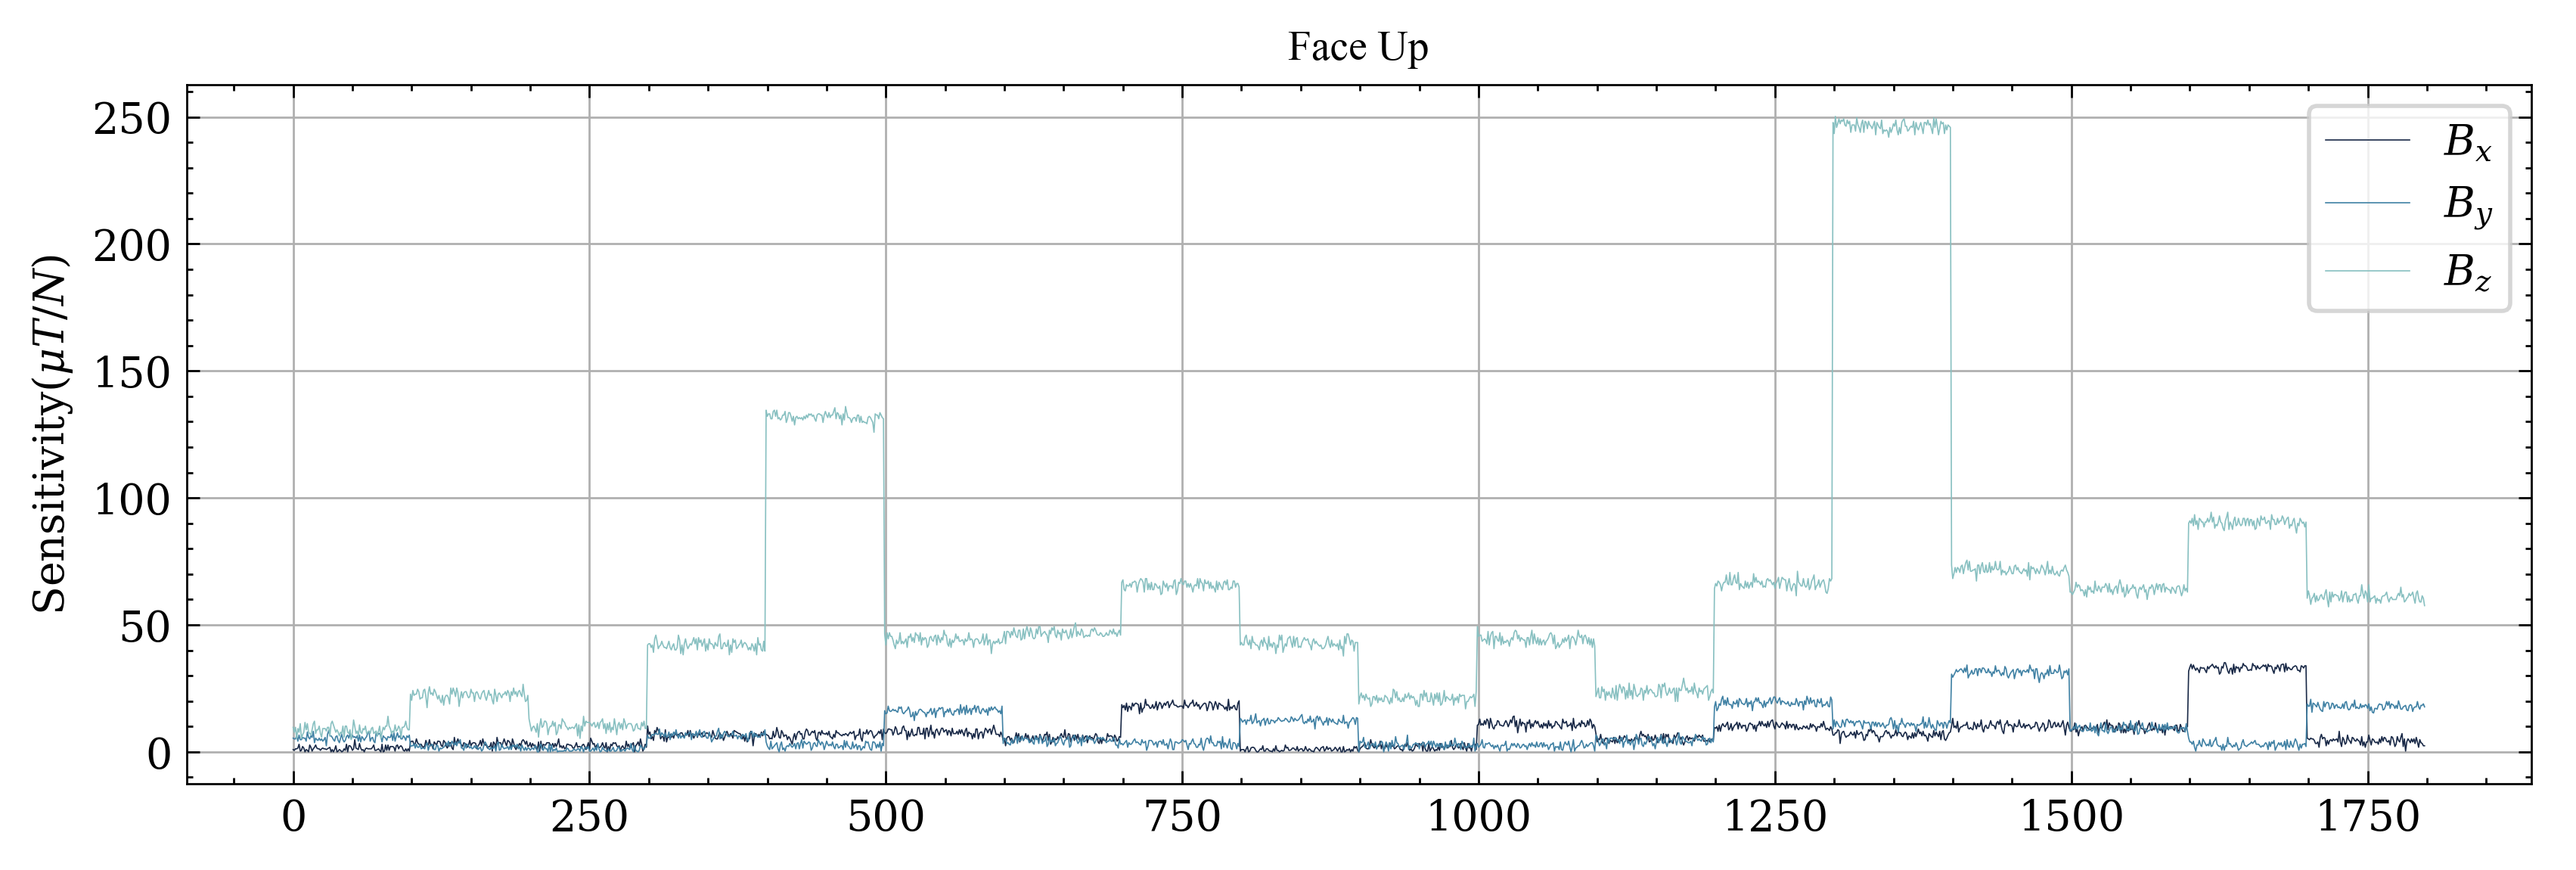

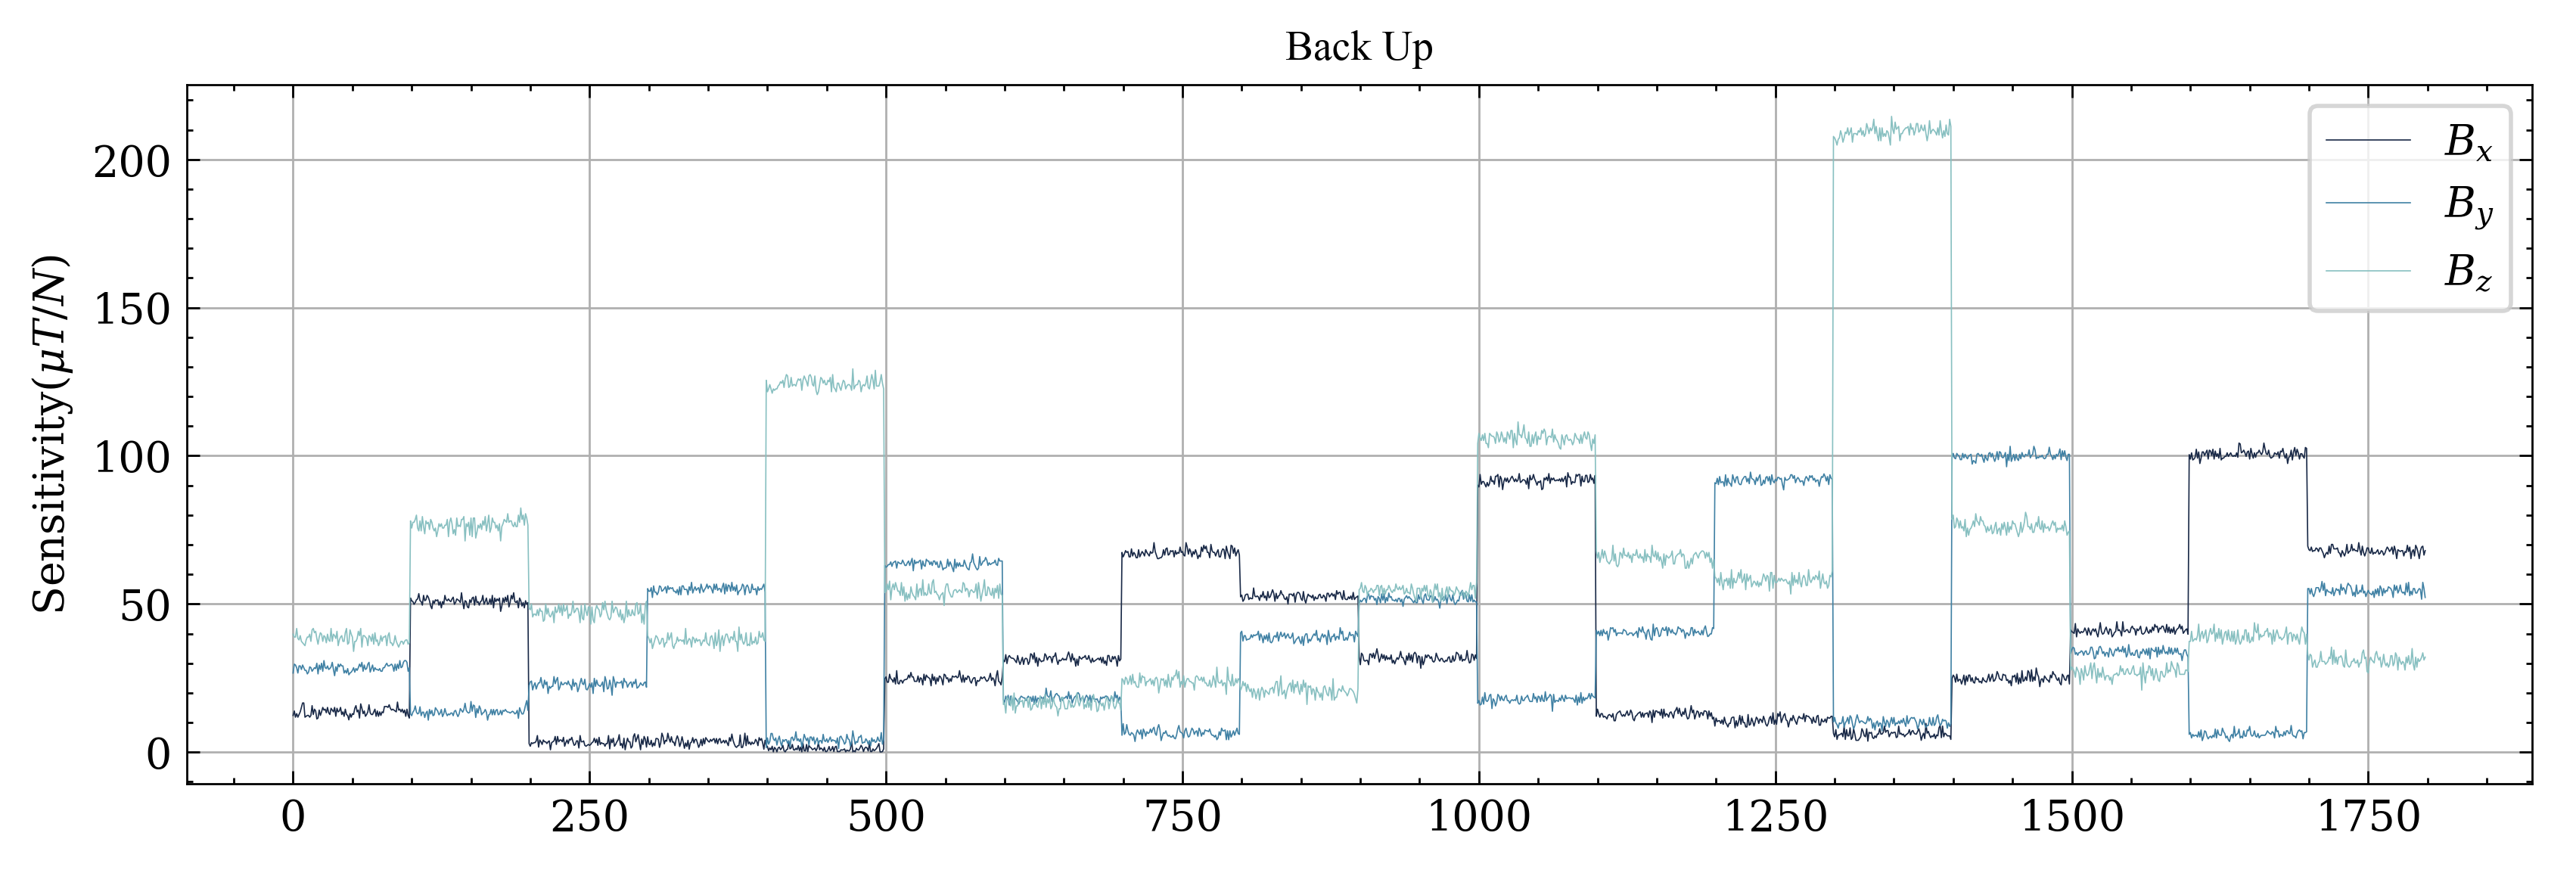

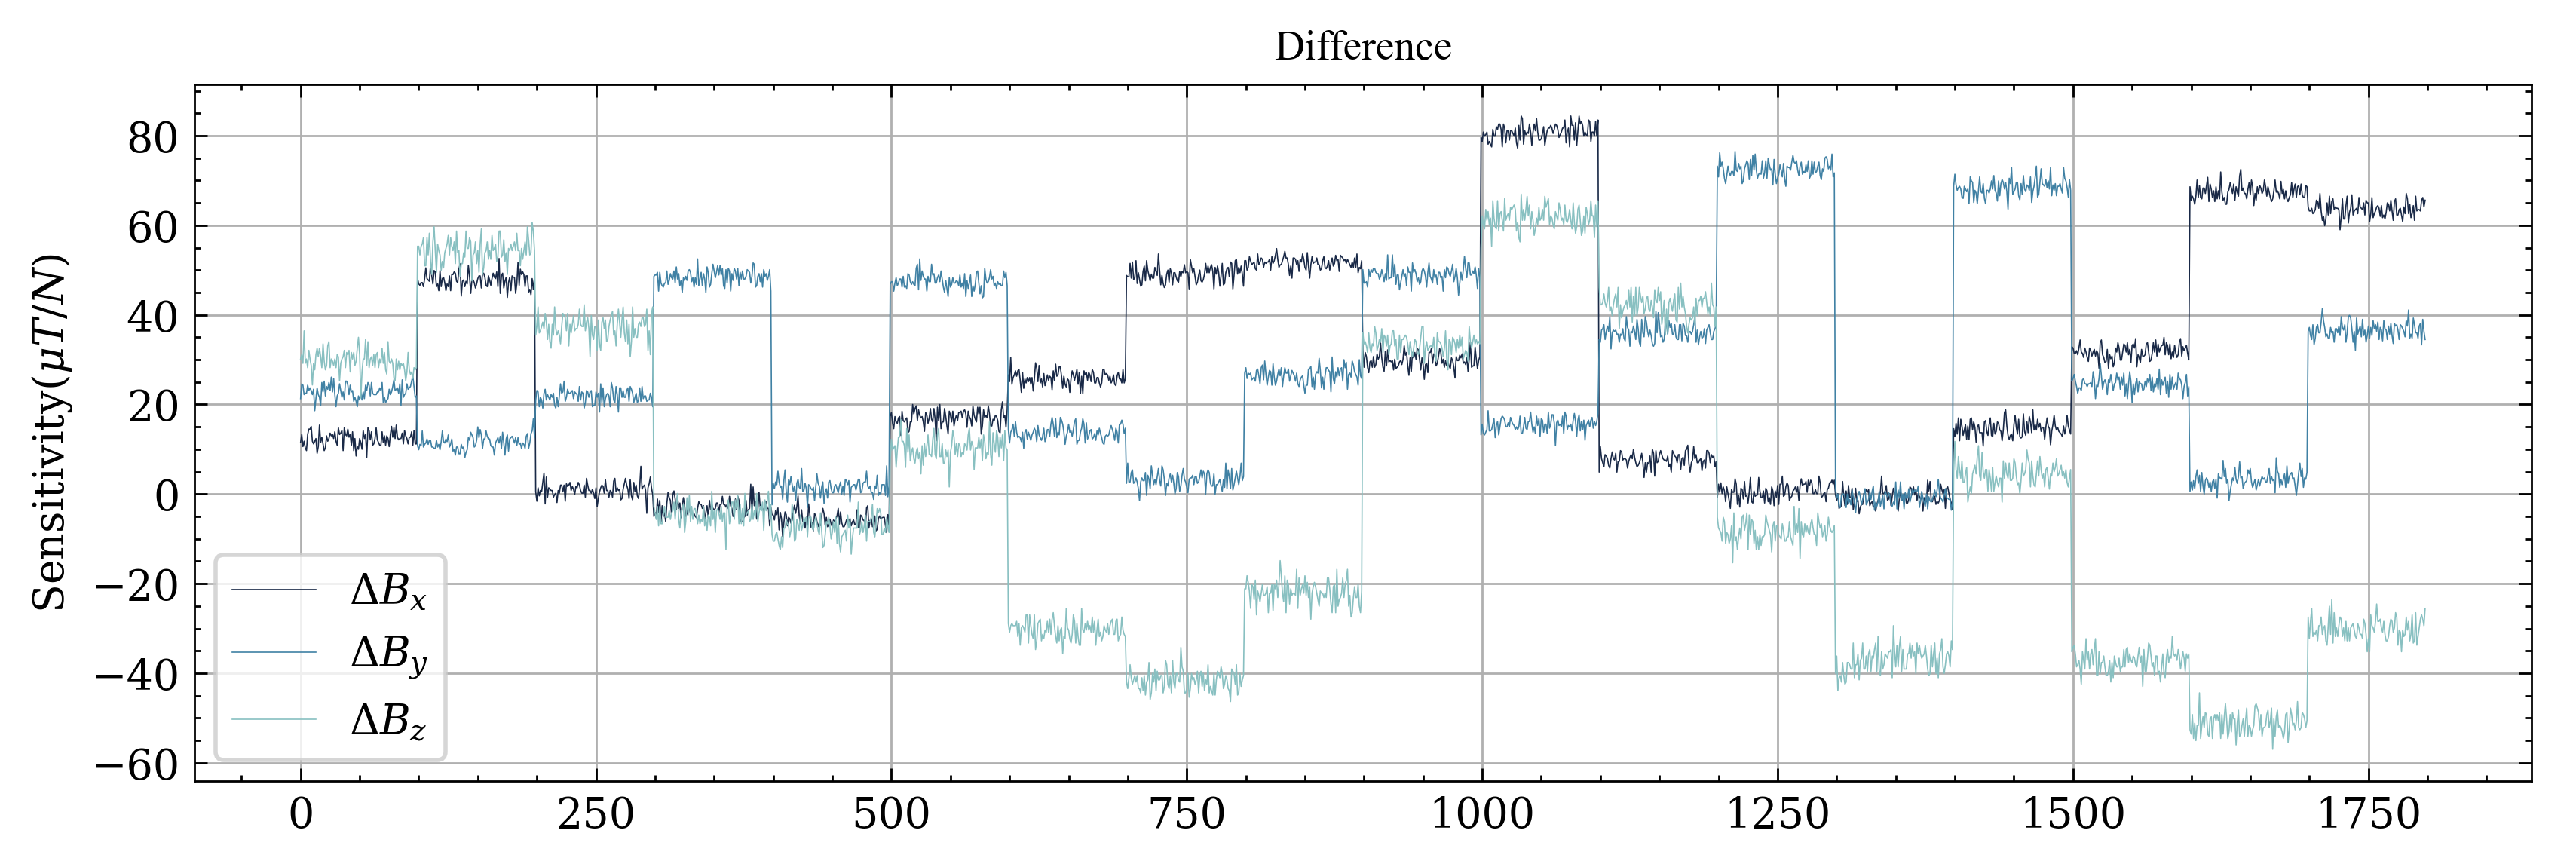

In [4]:
# 绝对值对比
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots
# import matplotlib
# matplotlib.use('TkAgg')

color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9']
font1 = {'family': 'Times New Roman',
'weight': 'normal',
'size': 10,
}
with plt.style.context(['science']):
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    upper = tset['upper'][:,5:]
    fupper = tset['upper'][:,4]
    lower = tset['bottom'][:,5:]
    flower = tset['bottom'][:,4]
    for i in range((36-9)):
        au = np.average(fupper[i*100:i*100+100])
        al = np.average(flower[i*100:i*100+100])
        for j in range(100):
            fupper[i*100+j] = au
            flower[i*100+j] = al
    plt.figure(figsize=(10, 3))        
    plt.plot(np.abs(upper[1801:,0]+64.5),linewidth=0.3,color=color_table[0],label='$B_x$')
    plt.plot(np.abs(upper[1801:,1]+33),linewidth=0.3,color=color_table[1],label='$B_y$')
    plt.plot(np.abs(upper[1801:,2]-283.6),linewidth=0.3,color=color_table[2],label='$B_z$')
    plt.ylabel('Sensitivity($\mu T/N$)')
    plt.title('Face Up',fontdict=font1)
    plt.grid()
    
    plt.legend()
    plt.figure(figsize=(10, 3))
    plt.plot(np.abs(lower[1801:,0]+382),linewidth=0.3,color=color_table[0],label='$B_x$')
    plt.plot(np.abs(lower[1801:,1]+228),linewidth=0.3,color=color_table[1],label='$B_y$')
    plt.plot(np.abs(lower[1801:,2]+106.6),linewidth=0.3,color=color_table[2],label='$B_z$')
    plt.ylabel('Sensitivity($\mu T/N$)')
    plt.title('Back Up',fontdict=font1)
    plt.grid()
    plt.legend()

    plt.figure(figsize=(10, 3))
    plt.plot(np.abs(lower[1801:,0]+382)-np.abs(upper[1801:,0]+64.5),linewidth=0.3,color=color_table[0],label='$\Delta B_x$')
    plt.plot(np.abs(lower[1801:,1]+228)-np.abs(upper[1801:,1]+33),linewidth=0.3,color=color_table[1],label='$\Delta B_y$')
    plt.plot(np.abs(lower[1801:,2]+106.6)-np.abs(upper[1801:,2]-283.6),linewidth=0.3,color=color_table[2],label='$\Delta B_z$')
    plt.ylabel('Sensitivity($\mu T/N$)')
    plt.title('Difference',fontdict=font1)
    plt.grid()
    plt.legend()
plt.show()